# Low / High Pass filter



In [1]:
from IPython.display import (
    Audio, 
    display
)
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Data

In [28]:
data, sampling_rate = librosa.load("./data/jfk.flac", sr=8192)
N = num_total_samples = data.shape[0]

print(f"sampling_rate:[{sampling_rate}], duration:[{data.shape[0] / sampling_rate}] seconds") 
display(Audio(data=data, rate=sampling_rate))

sampling_rate:[8192], duration:[11.0] seconds


# Sound Wave


# Audio Wave (Time Series)

Amplitude of the signal on the y-axis and time along the x-axis

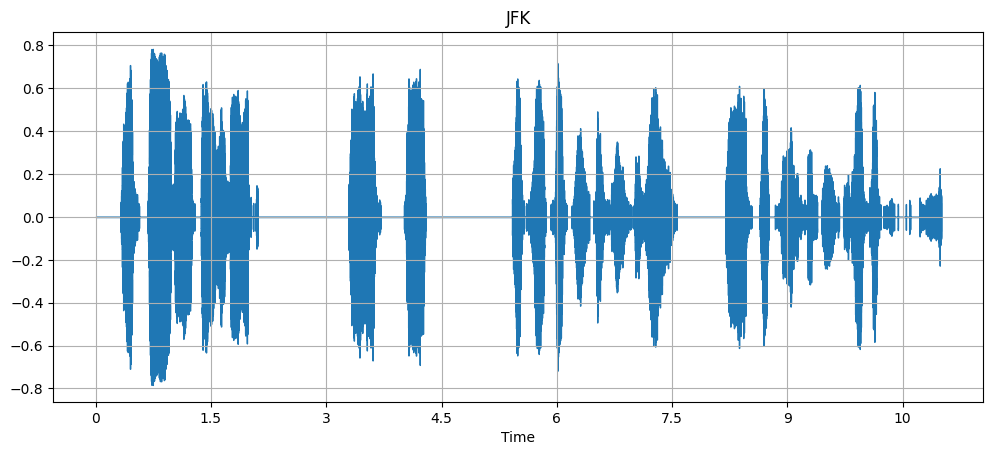

In [21]:
# data = data * (data > 0.05)
plt.figure().set_figwidth(12)
plt.title("JFK")
plt.grid()

librosa.display.waveshow(y=data, sr=sampling_rate)

# Frequency Spectrum

The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis.

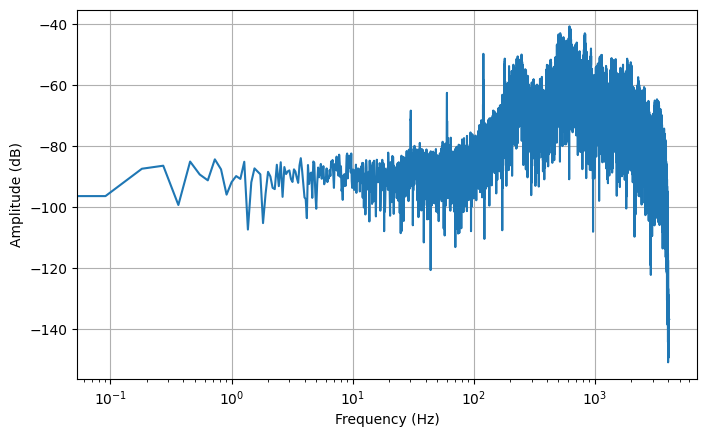

In [29]:
dft = np.fft.rfft(data, norm="forward", axis=-1)
amplitude = 2 * np.abs(dft)        # A = 2 * Xk
db = 20 * np.log10(amplitude)
frequency = np.fft.rfftfreq(n=len(data), d=1/sampling_rate)

plt.figure().set_figwidth(8)
plt.plot(frequency, db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xscale("log")

## melspectrogram

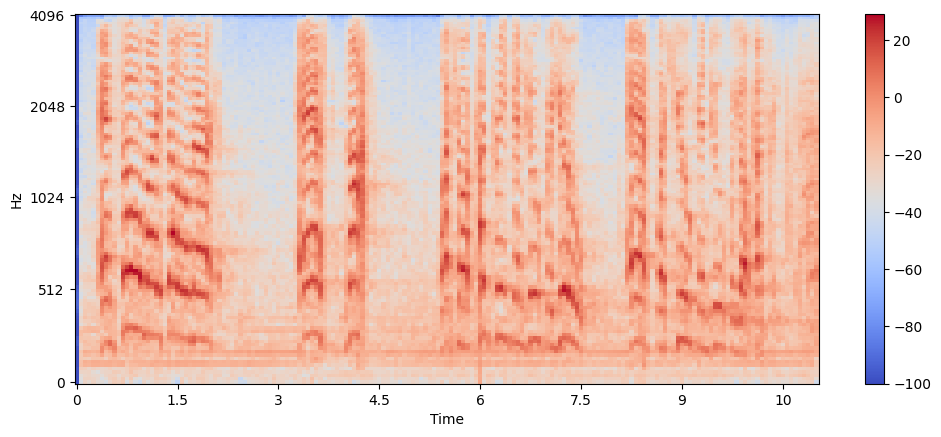

In [30]:
S = librosa.feature.melspectrogram(
    y=data, sr=sampling_rate, n_mels=128, fmax=sampling_rate/2, n_fft=1024, hop_length=512, norm='slaney'
)
S_dB = librosa.power_to_db(S, ref=1, top_db=None, amin=1e-10)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=sampling_rate/2)
plt.colorbar()

# Filter by power spectrum

In [35]:
power_filter_indices = db > -90

/tmp/ipykernel_56763/847057808.py:2: RuntimeWarning: divide by zero encountered in log10
  db_power_filtered = 20 * np.log10(2 * np.abs(dft_power_filtered))


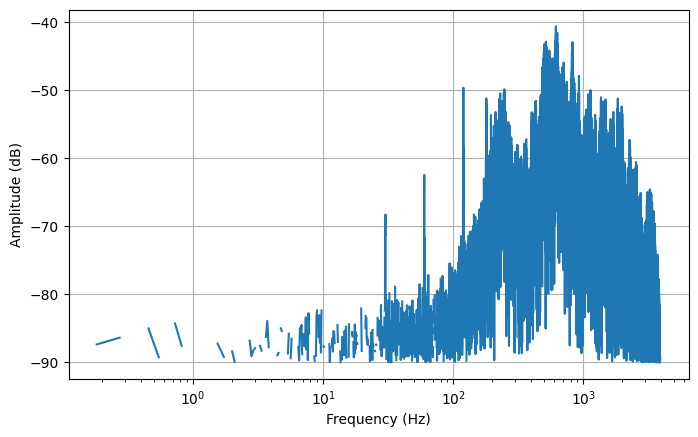

In [36]:
dft_power_filtered = dft * power_filter_indices
db_power_filtered = 20 * np.log10(2 * np.abs(dft_power_filtered))

plt.figure().set_figwidth(8)
plt.plot(frequency, db_power_filtered)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.xscale("log")

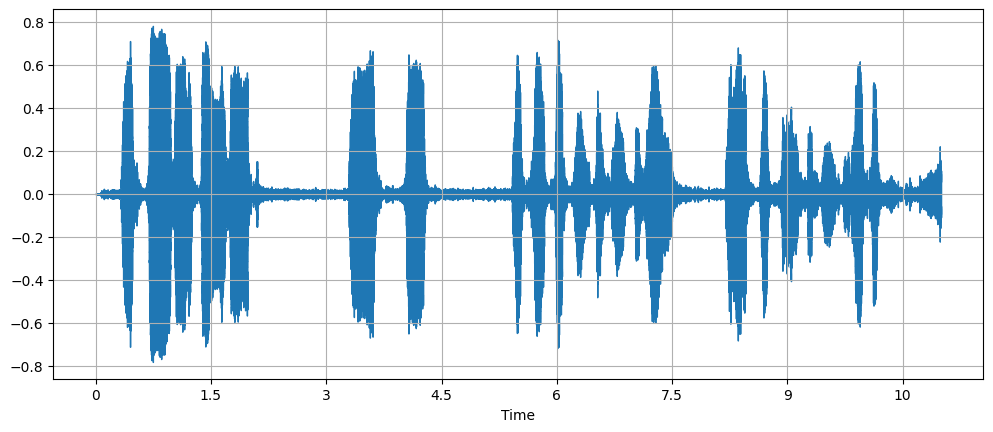

In [37]:
data_power_filtered = np.fft.irfft(dft_power_filtered, norm="forward")

plt.figure().set_figwidth(12)
plt.grid()
librosa.display.waveshow(y=data_power_filtered, sr=sampling_rate)
display(Audio(data=data_power_filtered, rate=sampling_rate))

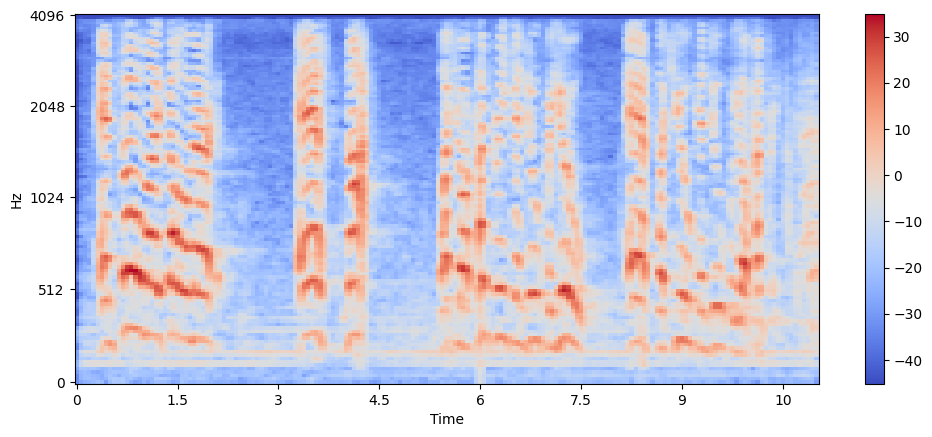

In [38]:
S = librosa.feature.melspectrogram(y=data_power_filtered, sr=sampling_rate, n_mels=128, fmax=sampling_rate/2)
S_dB = librosa.power_to_db(S)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=sampling_rate/2)
plt.colorbar()